# The first objective is to take this sample image, and break it down into readable and consistent sizes that center the object of interest. 

In [56]:

%matplotlib inline


import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from sklearn.preprocessing import normalize
from cv2 import COLOR_GRAY2RGB

In [2]:
imagefile = '/Users/noahkasmanoff/whatif_LSST/data/lsst.jpg'

Start again from here, using that other website method: https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

In [3]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2

# construct the argument parse and parse the arguments
#ap.add_argument("-i", "--image", required=True,
#                help="path to the image file")
#args = vars(ap.parse_args())

In [4]:
# load the image, convert it to grayscale, and blur it
image = cv2.imread(imagefile)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

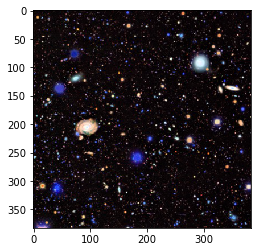

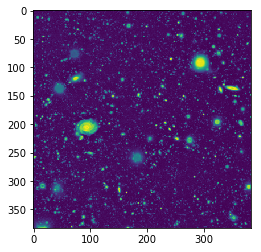

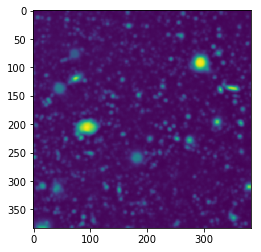

In [5]:
plt.imshow(image)
plt.figure()
plt.imshow(gray)
plt.figure()
plt.imshow(blurred)

In [61]:
# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(blurred, 69, 255, cv2.THRESH_BINARY)[1]

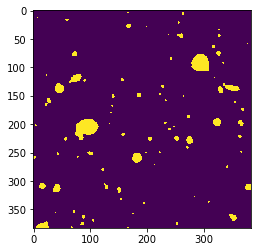

In [62]:
plt.imshow(thresh)

In [63]:
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


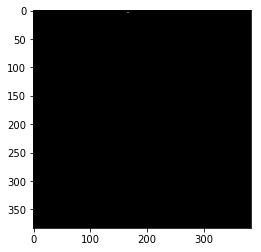

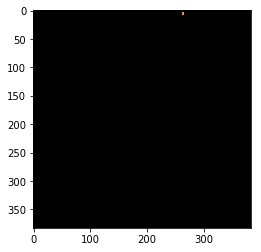

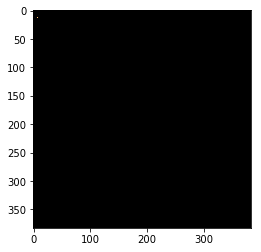

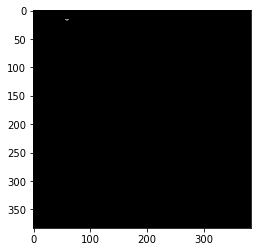

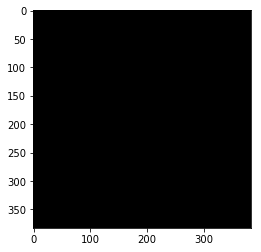

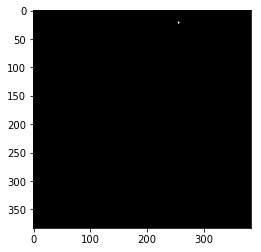

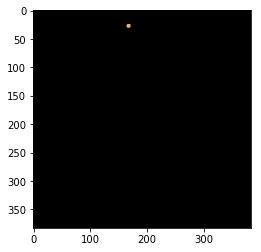

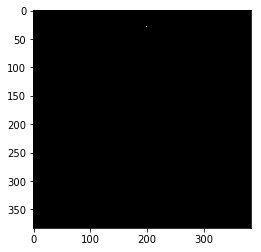

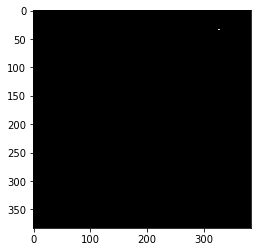

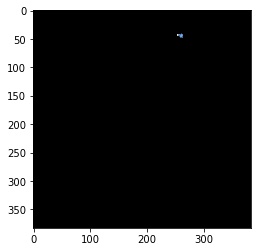

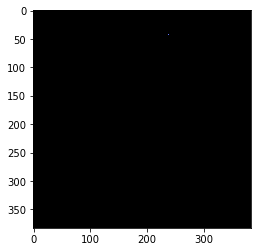

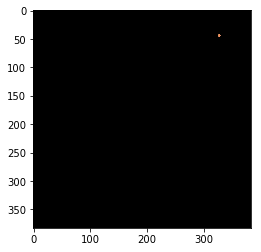

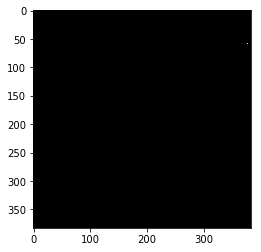

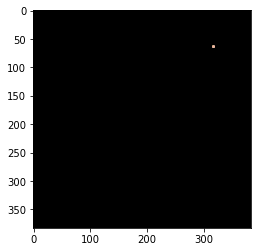

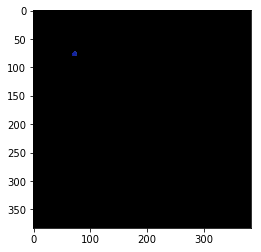

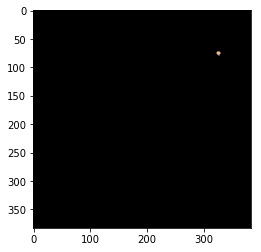

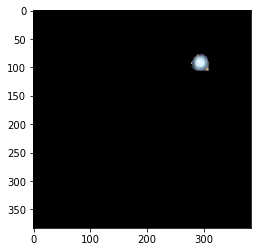

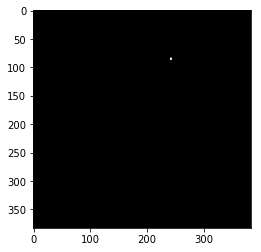

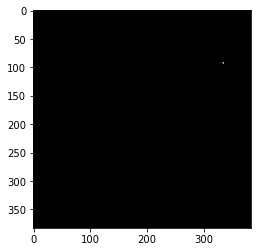

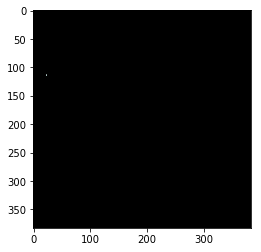

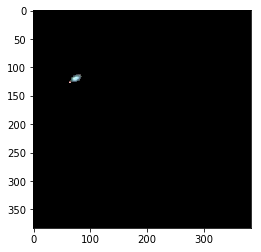

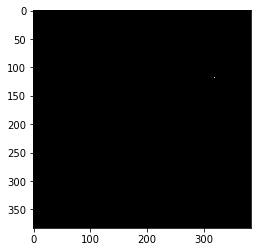

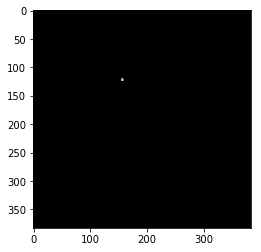

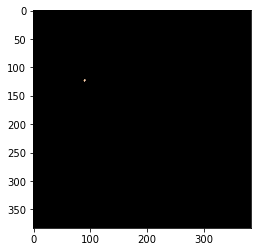

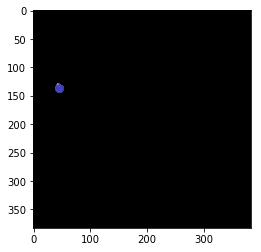

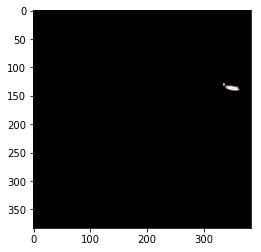

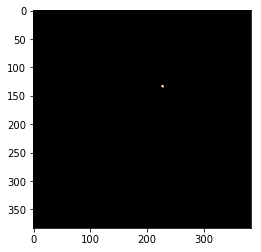

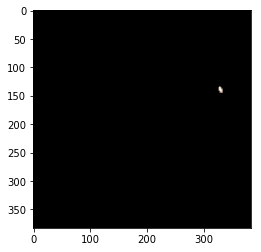

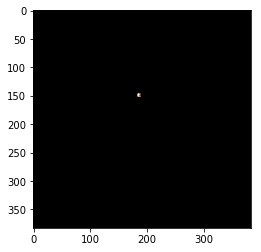

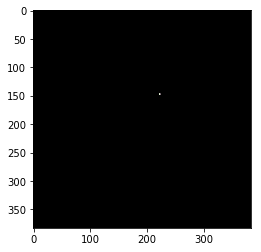

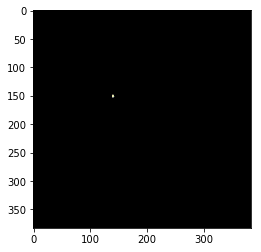

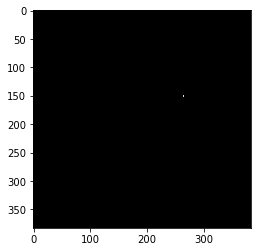

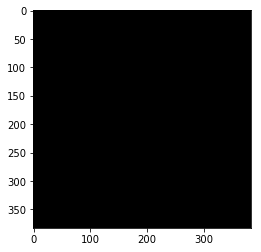

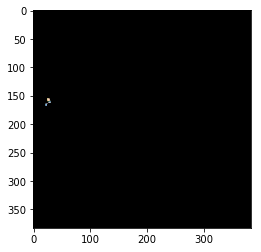

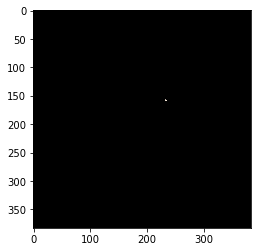

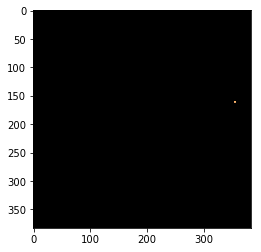

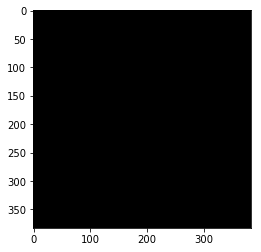

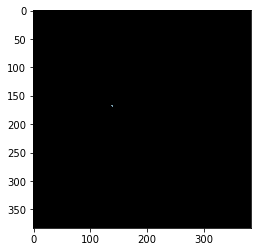

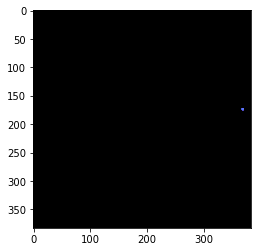

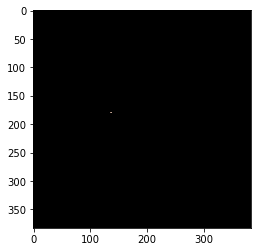

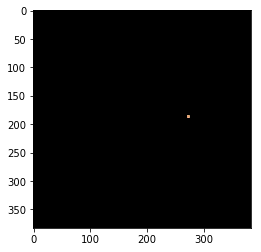

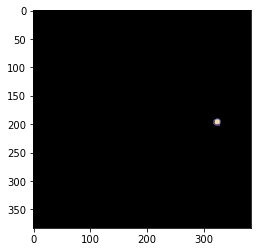

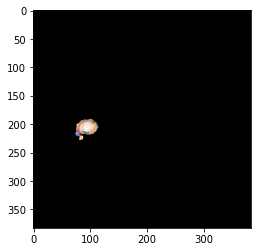

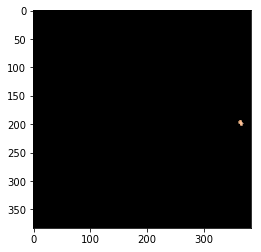

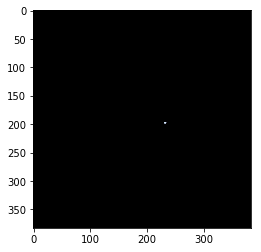

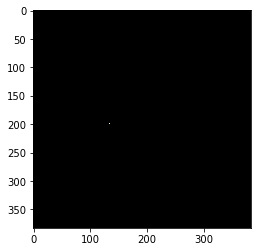

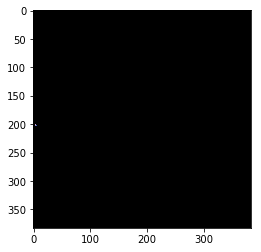

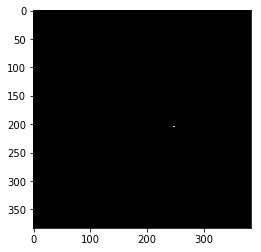

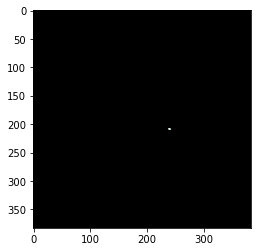

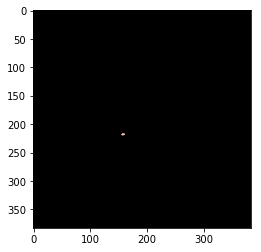

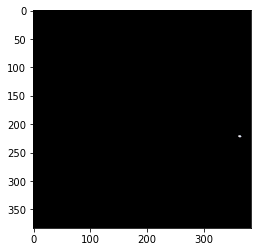

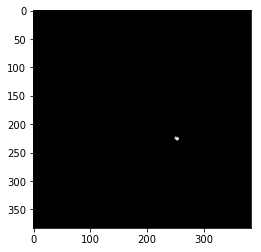

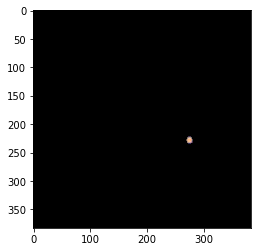

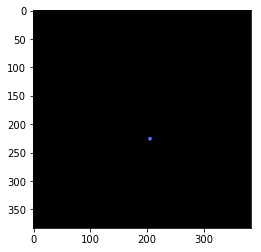

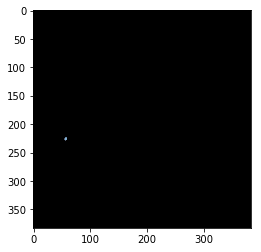

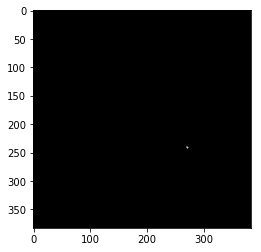

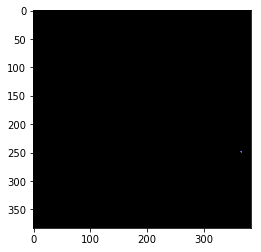

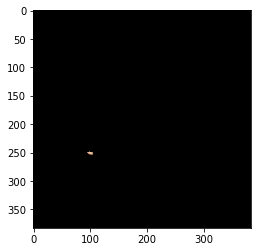

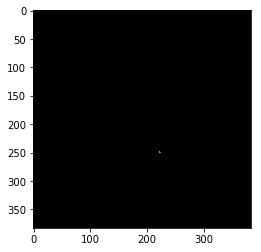

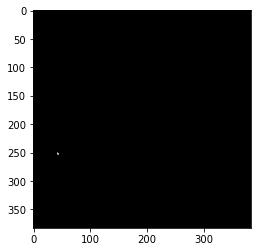

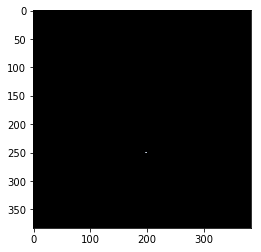

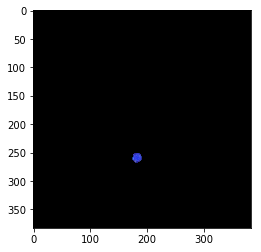

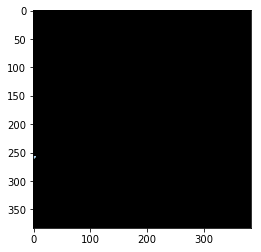

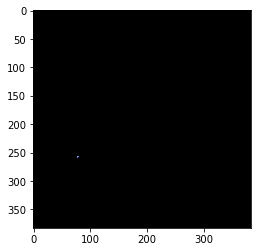

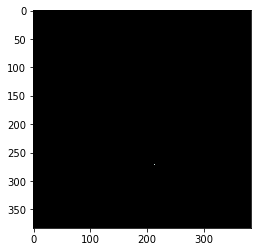

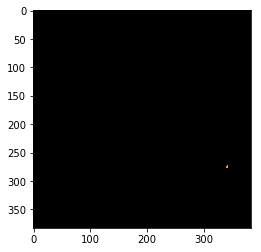

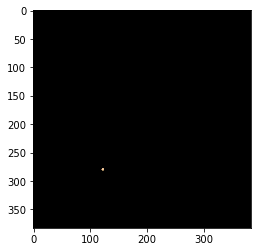

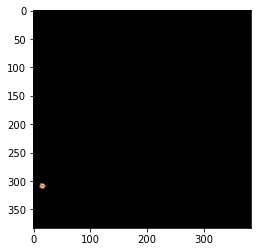

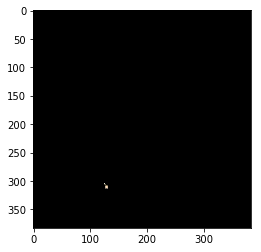

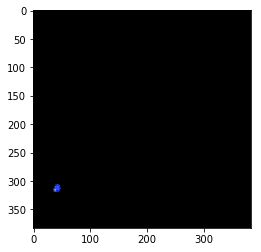

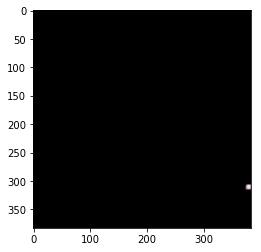

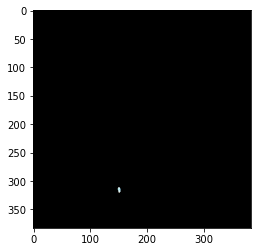

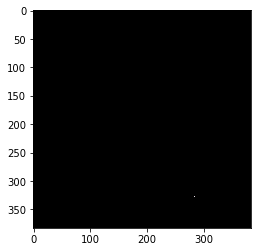

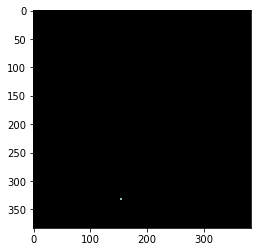

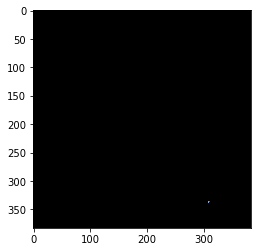

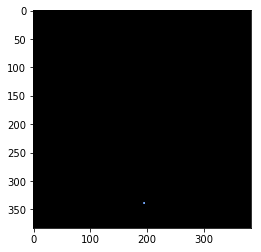

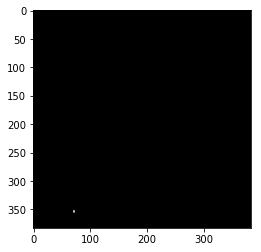

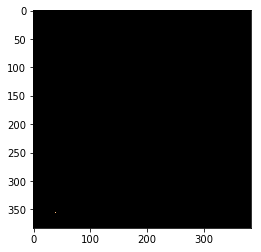

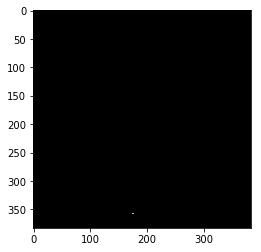

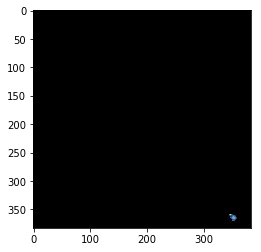

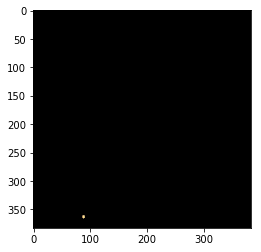

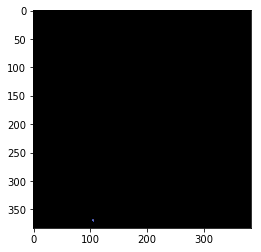

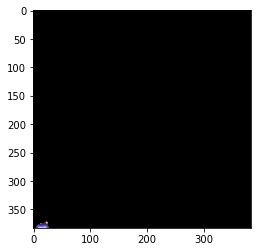

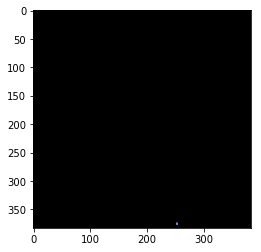

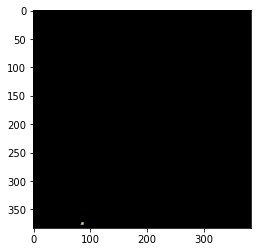

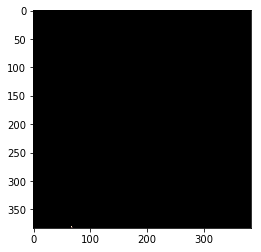

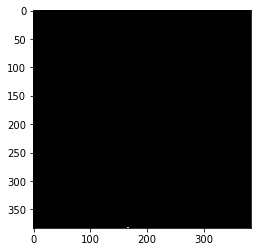

In [101]:
# loop over the unique components
image_identiciation_dataset = []
for label in np.unique(labels):
    image = cv2.imread(imagefile)

# if this is the background label, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255  #immediately make it as large as possible
    plt.figure()
    for i in range(len(labelMask)):
        for j in range(len(labelMask[i])):
            if labelMask[i][j] == 0:
                labelMask[i][j] = False
            else:
                labelMask[i][j] = True
    for color in range(np.shape(image)[2]):
    #print(image[:,:,color]) #this is one particular color 
        image[:,:,color] = np.multiply(labelMask,image[:,:,color])
        image_identiciation_dataset.append(image)
    plt.figure() #apply this masking to each component
    plt.imshow(image)
 #   plt.imshow(cv2.cvtColor(np.multiply(gray,labelMask), cv2.COLOR_GRAY2RGB))
  #  plt.imshow(np.multiply(gray,labelMask))

In [100]:
for color in range(np.shape(image)[2]):
    #print(image[:,:,color]) #this is one particular color 
    image[:,:,color] = np.multiply(labelMask,image[:,:,color])

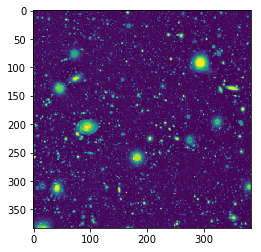

In [98]:
plt.imshow(image[:,:,2])

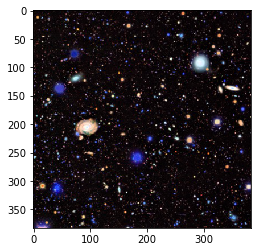

In [96]:
plt.imshow(image[:,:])

In [46]:
#if ==0, make false, if 255 make tru
#Dirty method right here

for i in range(len(labelMask)):
    for j in range(len(labelMask[i])):
        if labelMask[i][j] == 0:
            labelMask[i][j] = False
        else:
            labelMask[i][j] = True

In [47]:
#combine labelmask with original image. .. in greyscale! 

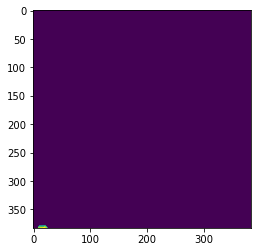

In [48]:
plt.imshow(np.multiply(gray,labelMask))

In [ ]:
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]

In [ ]:
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cX), int(cY)), int(radius),
        (0, 0, 255), 3)
    #cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
    #    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
# show the output image
plt.imshow( image)
cv2.waitKey(0)

In [ ]:
plt.imshow(image)

# Next sort of task: Mask each contour, and use it to create a new image file that contains just one image with each. Then plug it into the CNN. 